In [1]:
from ExcitonBSEKeldysh import ExcitonMoS2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cutoff=[0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0,np.inf]
A=[]
B=[]
A_opt=[]
B_opt=[]
K=[]
# plt.figure()
for cut in cutoff:
    Exciton=ExcitonMoS2(epsilon=2.5,N=60,vb=[12,13],cb=[14,15],spin_orbit=True,cutoff=cut)
    Exciton.constuctExcitonHamiltonian(Q=[0,0,0],optic=True)
    E,D=np.linalg.eigh(Exciton.HH)
    optical=np.zeros(Exciton.NH)
    P=np.array([Exciton.dx[indx] for indx in Exciton.indexes])
    for i in range(Exciton.NH):
        optical[i]=np.abs(np.sum(P*D[:,i].conj()))**2
    optical=optical[E<Exciton.Egap];E=E[E<Exciton.Egap]
    E=E[np.argsort(optical)];optical=np.sort(optical)
    
    
    K.append(int(np.sum(Exciton.weight)))
    A.append(E[-3])
    B.append(E[-1])
    A_opt.append(optical[-3])
    B_opt.append(optical[-1])
    
#     Exciton.calculateAbsobtionSpectrum(eta=0.01,n_iter=300,omega_n=5000)
#     Exciton.plotAbsobtionSpectrum(label=str(cut))
# plt.legend(loc='best')
# plt.xlim([1.8,Exciton.Egap])
# plt.ylim([0,1e4])

Exciton Hamiltonian size: 680 K-space size: 170
Construction Done!
Exciton Hamiltonian size: 800 K-space size: 200
Construction Done!
Exciton Hamiltonian size: 848 K-space size: 212
Construction Done!
Exciton Hamiltonian size: 1064 K-space size: 266
Construction Done!
Exciton Hamiltonian size: 1136 K-space size: 284
Construction Done!
Exciton Hamiltonian size: 1376 K-space size: 344
Construction Done!
Exciton Hamiltonian size: 1520 K-space size: 380
Construction Done!
Exciton Hamiltonian size: 1640 K-space size: 410
Construction Done!
Exciton Hamiltonian size: 2000 K-space size: 500
Construction Done!
Exciton Hamiltonian size: 2192 K-space size: 548
Construction Done!
Exciton Hamiltonian size: 2552 K-space size: 638
Construction Done!
Exciton Hamiltonian size: 4688 K-space size: 1172
Construction Done!
Exciton Hamiltonian size: 6624 K-space size: 1656
Construction Done!
Exciton Hamiltonian size: 14400 K-space size: 3600
Construction Done!


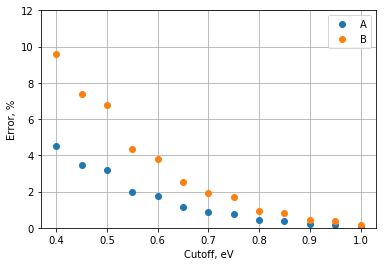

In [3]:
# plt.figure(figsize=(8,6))
plt.plot(cutoff,-(np.array(A)-A[-1])/(A[-1]-Exciton.Egap)*100,'o',label='A')
plt.plot(cutoff,-(np.array(B)-B[-1])/(B[-1]-Exciton.Egap)*100,'o',label='B')
plt.grid()
plt.legend()
plt.xlabel('Cutoff, eV')
plt.ylabel('Error, %')
plt.ylim([0,12])
plt.savefig('Error_vs_cutoff.png',dpi=600)

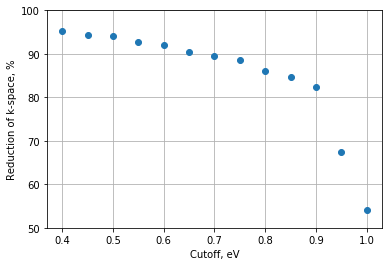

In [4]:
plt.plot(cutoff,(1-np.array(K)/K[-1])*100,'o')
plt.grid()
plt.xlabel('Cutoff, eV')
plt.ylabel('Reduction of k-space, %')
plt.ylim([50,100])
plt.savefig('Reduction_vs_cutoff.png',dpi=600)